## Predicting Additional Insurance Product Purchase - Logistic Regression Model - By Group2
### Introduction
In the competitive insurance industry, retaining customers and expanding relationships with them is key to business growth. One effective strategy is to offer additional products to existing customers. In this project, we aim to develop a predictive model that helps a large insurance company identify which of its current customers are most likely to purchase an additional insurance product.

Using a dataset with over 14,000 customer records, we will explore factors such as customer demographics, loyalty levels, product purchase behavior, and financial information to develop and evaluate a logistic regression model. The insights derived from this model will assist the company in tailoring marketing strategies to improve customer retention and cross-selling efforts.

### Project Goals:
- **Data Understanding & Preprocessing:** Explore the dataset and clean it for any inconsistencies such as missing values or outliers.
- **Feature Engineering:** Perform feature encoding and scaling where needed, particularly on categorical data like loyalty levels and product types.
- **Model Development:** Build a logistic regression model to predict the likelihood of purchasing additional products.
- **Model Evaluation:** Use metrics such as accuracy, precision, recall, and F1-score to assess the performance of the model.
  
Let’s begin by loading and exploring the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset from the provided URL
df=pd.read_csv('https://raw.githubusercontent.com/dheerajyeshiva/DAV-6150/refs/heads/main/M7_Data.csv')

In [3]:
df.shape

(14016, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TARGET      14016 non-null  object 
 1   loyalty     14016 non-null  int64  
 2   ID          14016 non-null  int64  
 3   age         14016 non-null  int64  
 4   city        14016 non-null  int64  
 5   LOR         14016 non-null  int64  
 6   prod_A      14016 non-null  int64  
 7   type_A      14016 non-null  int64  
 8   type_B      14016 non-null  int64  
 9   prod_B      14016 non-null  int64  
 10  turnover_A  14016 non-null  float64
 11  turnover_B  14016 non-null  float64
 12  contract    14016 non-null  int64  
 13  age_P       14016 non-null  int64  
 14  lor_M       14016 non-null  int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 1.6+ MB


In [5]:
df.head()

,TARGET,loyalty,ID,age,city,LOR,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,contract,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,0,333.561114,264.721010,2,66,3
1,Y,1,159,45,2,3,1,3,3,1,394.735699,284.904978,2,45,39
2,Y,1,220,42,2,2,1,3,6,1,342.180990,1175.589721,2,42,27
3,Y,99,303,31,2,0,0,0,0,0,453.757916,242.341754,2,31,3
4,Y,99,306,62,2,0,0,0,0,0,384.577469,287.008370,2,62,3


### Exploratary Data Analysis & Data Preparation

In [6]:
# Getting count of number of unique values in each column
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values.")

Column 'TARGET' has 2 unique values.
Column 'loyalty' has 5 unique values.
Column 'ID' has 11008 unique values.
Column 'age' has 86 unique values.
Column 'city' has 65 unique values.
Column 'LOR' has 7 unique values.
Column 'prod_A' has 2 unique values.
Column 'type_A' has 3 unique values.
Column 'type_B' has 4 unique values.
Column 'prod_B' has 2 unique values.
Column 'turnover_A' has 11008 unique values.
Column 'turnover_B' has 11008 unique values.
Column 'contract' has 1 unique values.
Column 'age_P' has 86 unique values.
Column 'lor_M' has 7 unique values.


In [7]:
# Checking if the DataFrame contains any missing (null) values
df.isnull().values.any()

False

In [8]:
df.duplicated().value_counts()  # Checking for duplicates

,count
False,11008
True,3008


There are 3008 duplicate rows in the dataset

In [9]:
#dropping the duplicate values
df.drop_duplicates(keep='first', inplace=True)

In [10]:
# Checking the shape of the dataset after dropping the duplicate values
df.shape

(11008, 15)

In [11]:
# dropping ID as it has all unique values and it is not gonna be useful for our further analysis and model building
df.drop('ID', axis=1, inplace=True)

In [12]:
# dropping contract feature as it has one unique value(2) which wont be useful too
df.drop('contract', axis=1, inplace=True)

In [13]:
# dropping LOR( Length of Relationship in years) as we can derive this using the LOR(in months)
df.drop('LOR', axis=1, inplace=True)

In [14]:
# Display the descriptive statistics
df.describe()

,loyalty,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
count,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000,11008.000000
mean,46.533612,34.845203,-724.143078,0.584393,1.759448,2.097929,0.652253,372.332403,344.120565,34.845203,14.791788
std,48.292402,13.032781,26949.664365,0.492849,1.490133,1.671441,0.476277,96.685932,524.372413,13.032781,11.272981
min,0.000000,5.000000,-999999.000000,0.000000,0.000000,0.000000,0.000000,300.095909,191.962852,5.000000,3.000000
25%,2.000000,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,332.229899,218.302029,24.000000,3.000000
50%,3.000000,31.000000,2.000000,1.000000,3.000000,3.000000,1.000000,361.930298,235.025216,31.000000,15.000000
75%,99.000000,42.000000,2.000000,1.000000,3.000000,3.000000,1.000000,391.567662,253.759401,42.000000,15.000000
max,99.000000,102.000000,235.000000,1.000000,6.000000,9.000000,1.000000,5568.784139,12249.084770,102.000000,75.000000


## Insights:

#### 1. **Data Completeness**
- Each feature in the dataset contains **11,008** entries, indicating a complete dataset with no missing values.

#### 2. **Age Distribution**
- The average age of individuals in the dataset is approximately **34.85** years.
- Age ranges from a minimum of **5** years to a maximum of **102** years, indicating a wide demographic spread.

#### 3. **Loyalty Scores**
- The average loyalty score is around **46.53**, with a notable maximum score of **99**.
- A substantial portion of the dataset has a loyalty score of **3 or lower** (median), suggesting many individuals may be at the lower end of the loyalty spectrum.

#### 4. **City Values**
- The `city` feature shows a significant variance, with a mean of **-724.14** and a maximum value of **235**. The extreme minimum of **-999,999** suggests possible data quality issues or outliers that need addressing.

#### 5. **Product Preferences**
- The average values for product types (`prod_A` and `prod_B`) are relatively low, suggesting limited engagement with those products. Specifically:
  - `prod_A` has a mean of **0.58**.
  - `prod_B` has a mean of **0.65**.

#### 6. **Turnover Figures**
- The average turnover for `turnover_A` is about **372.33**, while `turnover_B` is significantly higher at **344.12**.
- The standard deviation of `turnover_B` is notably high (**524.37**), indicating a wide range of turnover values and potential outliers.

#### 7. **Age and Loyalty Correlation**
- The median age of individuals (31 years) aligns with the mean, suggesting a balanced distribution. Young individuals may show varying loyalty scores, with the average loyalty score of **14.79**.

These insights highlight important trends and potential areas for further investigation, such as data quality issues in the `city` feature and the need for strategies to enhance customer loyalty and product engagement.

In [15]:
# age and age_p are same values and hence one of them can be dropped too
df.drop('age_P', axis=1, inplace=True)

In [16]:
df.columns

Index(['TARGET', 'loyalty', 'age', 'city', 'prod_A', 'type_A', 'type_B',
       'prod_B', 'turnover_A', 'turnover_B', 'lor_M'],
      dtype='object')

In [17]:
# Count the occurrences of each category in the TARGET variable
df.TARGET.value_counts()

,count
TARGET,
N,8000
Y,3008


In [18]:
# Changing the Target values from string to boolean
df['TARGET']=df['TARGET'].apply(lambda x:1 if x=='Y' else 0)

In [19]:
df.head()

,TARGET,loyalty,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M
0,1,99,66,2,0,0,0,0,333.561114,264.721010,3
1,1,1,45,2,1,3,3,1,394.735699,284.904978,39
2,1,1,42,2,1,3,6,1,342.180990,1175.589721,27
3,1,99,31,2,0,0,0,0,453.757916,242.341754,3
4,1,99,62,2,0,0,0,0,384.577469,287.008370,3


In [20]:
# Group by 'prod_A' and 'type_A' and count the occurrences
prod_type_count_a = df.groupby(['prod_A', 'type_A']).size().reset_index(name='count')
prod_type_count_a

,prod_A,type_A,count
0,0,0,4575
1,1,3,6410
2,1,6,23


In [21]:
# Group by 'prod_B' and 'type_B' and count the occurrences
prod_type_count_b = df.groupby(['prod_B', 'type_B']).size().reset_index(name='count')
prod_type_count_b

,prod_B,type_B,count
0,0,0,3828
1,1,3,6695
2,1,6,452
3,1,9,33


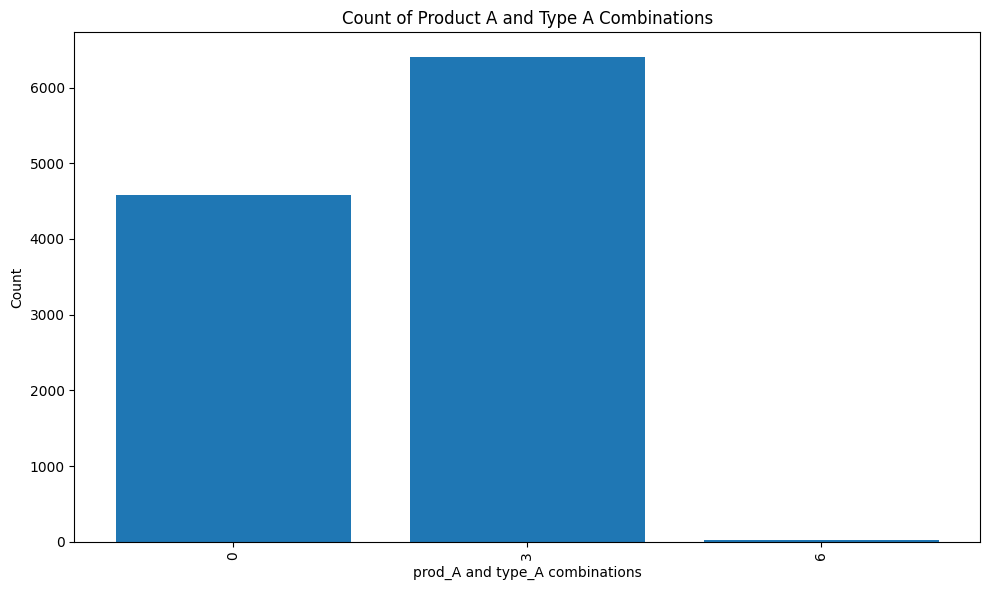

In [22]:
# Creating bar plot of 'type_A' at x-axis and 'count' as the y-axis to visualizes the distribution of purchases across different types of Product A
plt.figure(figsize=(10, 6))
plt.bar(prod_type_count_a['type_A'].astype(str), prod_type_count_a['count'])

# Set the labels and title
plt.xlabel('prod_A and type_A combinations')
plt.ylabel('Count')
plt.title('Count of Product A and Type A Combinations')
plt.xticks(rotation=90)  # Rotate x labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

The bar chart illustrates the counts of different combinations of product A and type A. There are three unique combinations: 0, 3, and 6. The combination with 0 occurrences is the least common, while the one with 3 occurrences is the most common. The combination with 6 occurrences ranks as the second least common.

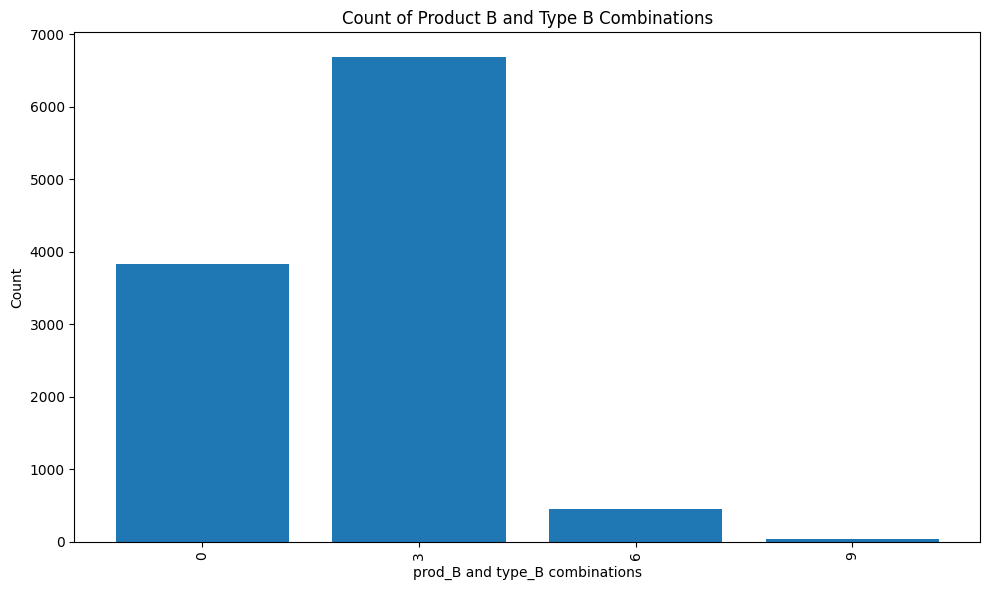

In [23]:
# Creating bar plot of 'type_A' at x-axis and 'count' as the y-axis to visualizes the distribution of purchases across different types of Product A
plt.figure(figsize=(10, 6))
plt.bar(prod_type_count_b['type_B'].astype(str), prod_type_count_b['count'])

# Set the labels and title
plt.xlabel('prod_B and type_B combinations')
plt.ylabel('Count')
plt.title('Count of Product B and Type B Combinations')
plt.xticks(rotation=90)  # Rotate x labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

The bar chart illustrates the counts of combinations of product B and type B. There are four distinct combinations: 0, 3, 6, and 9. The combination with 0 occurrences is the second least common, while the combination with 3 occurrences is the most common. The combination with 6 occurrences is the least common, and the one with 9 occurrences is the second most common.

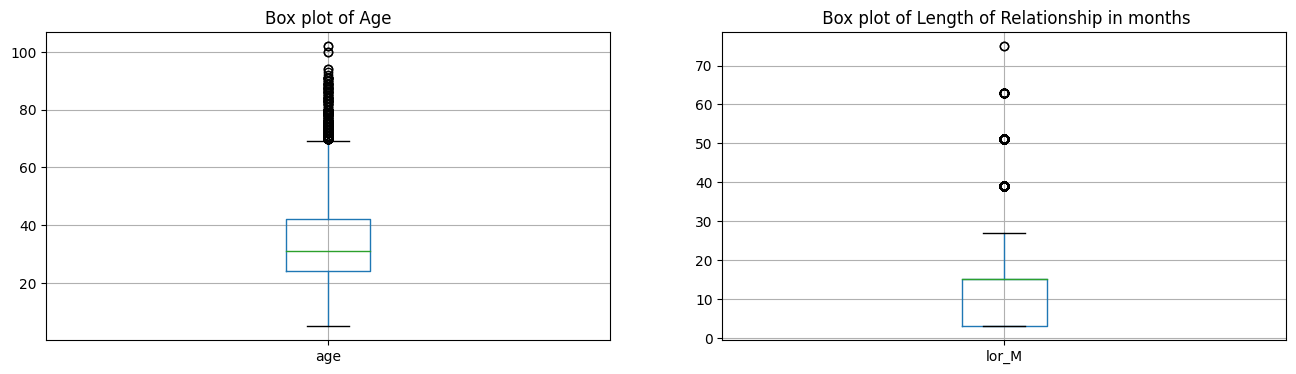

In [24]:
# Create a box plot for the 'age'  and 'lor_M' column to visualize its distribution and identify outliers
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
df.boxplot(column='age');
plt.title("Box plot of Age");


plt.subplot(1, 2, 2)
df.boxplot(column='lor_M');
plt.title(" Box plot of Length of Relationship in months");

1. The median age (from the 'age' column) of around 40 indicates a mature demographic, while the median length of relationship (from the 'lor_M' column) of 15 months reflects generally shorter relationships.
2. Both distributions exhibit the same interquartile range of 20, suggesting comparable variability in age and relationship length across the dataset.
3. Outliers are present in both distributions, with age outliers at the higher end and relationship length outliers appearing on both ends, highlighting diverse relationship dynamics.

# Prepped Data Review

In [25]:
df['loyalty'].value_counts()

,count
loyalty,
99,5048
3,2701
1,2019
2,1184
0,56



The dataset categorizes loyalty levels as 0: None, 1: Low, 2: Medium, 3: High, and 99: Unclassified. The unclassified group (99) is the most prevalent, with 5,048 instances, suggesting a large portion of customers whose loyalty status is undefined. The high loyalty category (3) follows with 2,701 occurrences, indicating a significant number of highly loyal customers. Low loyalty (1) has 2,019 counts, representing a sizable group that could benefit from loyalty-building efforts. Medium loyalty (2) accounts for 1,184 occurrences, while the no-loyalty group (0) is the least common, with just 56 instances. This distribution highlights opportunities to classify unclassified customers and target low-loyalty groups for engagement.

In [26]:
def plot_countplots(df, columns):
    """
    Plots countplots for specified columns in the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to create countplots for.
    """
    # Set the number of subplots based on the number of columns
    num_columns = len(columns)
    num_rows = (num_columns + 1) // 2  # Arrange plots in rows

    plt.figure(figsize=(12, num_rows * 4))  # Adjust figure size

    for i, column in enumerate(columns):
        plt.subplot(num_rows, 2, i + 1)  # Create subplot
        sns.countplot(data=df, x=column, hue='TARGET')  # Create countplot
        plt.title(f'Count Plot for {column}')
        # plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plots



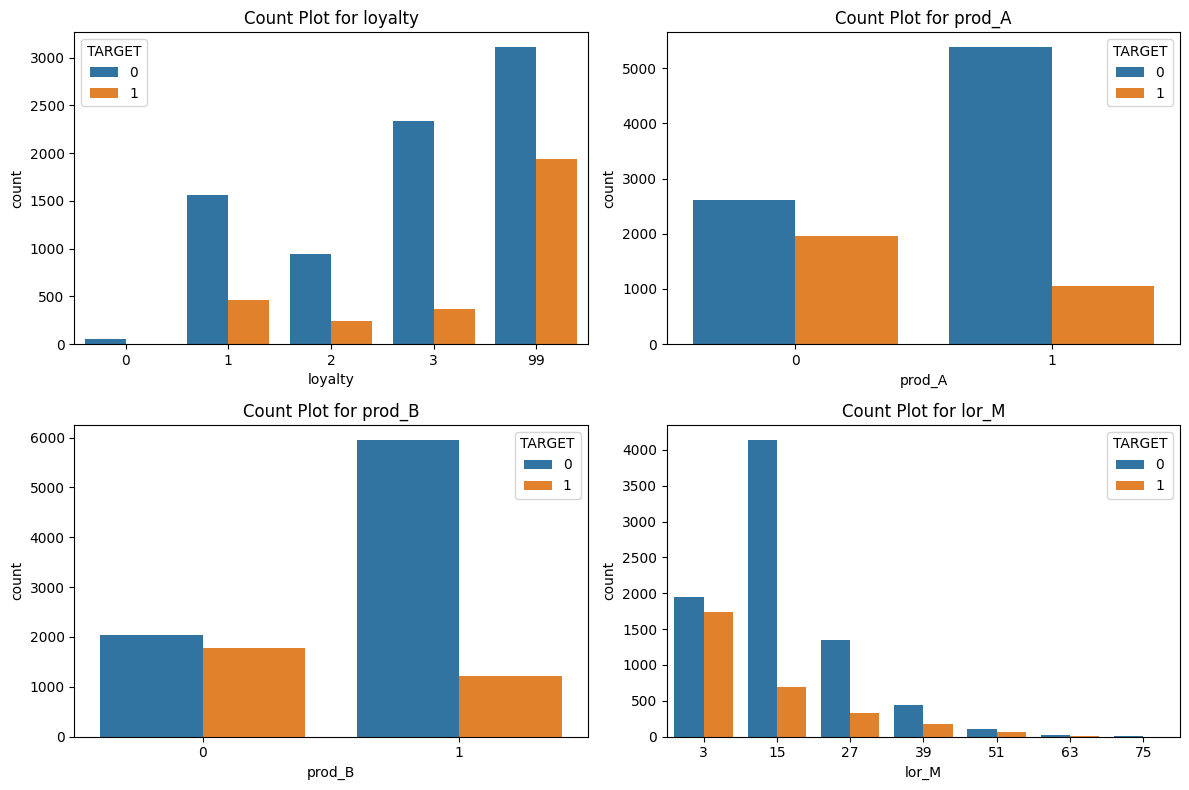

In [27]:
plot_countplots(df, ['loyalty','prod_A','prod_B','lor_M'])

**Strong Loyalty Influence**: The significant difference in counts between loyalty levels 0 and 1 suggests that loyalty may play a crucial role in the dataset. Higher loyalty levels could be linked to more favorable outcomes, making it a key factor to investigate further.

**Moderate Product Engagement**: While there is a difference in counts for prod_A and prod_B, the variation is less dramatic than that observed for loyalty. This indicates that while products A and B are relevant, loyalty might have a more pronounced impact on customer behavior or outcomes.

**Potential Relationship Trends**: The decreasing trend in the length of relationship (lor M) suggests that as the relationship length increases, the count of observations decreases. This might indicate that shorter relationships are more common, which could affect customer retention strategies.

In [28]:
df.TARGET.value_counts()

,count
TARGET,
0,8000
1,3008


### One Hot Encoding

In [29]:
# we shall perform one hot encoding on loyalty
df['loyalty'] = df['loyalty'].replace({0: 'loyalty_0', 1: 'loyalty_1', 2: 'loyalty_2', 3: 'loyalty_3', 99: 'loyalty_99'})

# Apply one-hot encoding to create new columns
df = pd.get_dummies(df, columns=['loyalty'], prefix='', prefix_sep='')

df.head()
# # Rename the loyalty columns
df.rename(columns={
    'loyalty_0': 'loyalty_none',
    'loyalty_1': 'loyalty_low',
    'loyalty_2': 'loyalty_medium',
    'loyalty_3': 'loyalty_high',
    'loyalty_99': 'loyalty_unclassified'
}, inplace=True)

df.head()


,TARGET,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M,loyalty_none,loyalty_low,loyalty_medium,loyalty_high,loyalty_unclassified
0,1,66,2,0,0,0,0,333.561114,264.721010,3,False,False,False,False,True
1,1,45,2,1,3,3,1,394.735699,284.904978,39,False,True,False,False,False
2,1,42,2,1,3,6,1,342.180990,1175.589721,27,False,True,False,False,False
3,1,31,2,0,0,0,0,453.757916,242.341754,3,False,False,False,False,True
4,1,62,2,0,0,0,0,384.577469,287.008370,3,False,False,False,False,True


In [30]:
df.dtypes

,0
TARGET,int64
age,int64
city,int64
prod_A,int64
type_A,int64
type_B,int64
prod_B,int64
turnover_A,float64
turnover_B,float64
lor_M,int64


In [31]:
df[['loyalty_none','loyalty_low','loyalty_medium','loyalty_high','loyalty_unclassified']] = df[['loyalty_none','loyalty_low','loyalty_medium','loyalty_high','loyalty_unclassified']].astype(int)

In [32]:
df.city.value_counts()

,count
city,
2,10769
0,20
1,17
8,17
9,16
...,...
72,1
31,1
51,1


In [33]:
len(df[df.city == -999999])

8

The value -999999 in your city column is likely an invalid placeholder or a missing data indicator. This is a common approach when datasets use extreme or unlikely values to represent missing or undefined entries (also called sentinel values).

In [34]:
# Drop rows the with value -999999 as the number  of the rows are around 8 values which is pretty less
df = df[df.city != -999999]
df.shape

(11000, 15)

In [35]:
# Replace other city codes with 'other_city'
df['city'] = df['city'].apply(lambda x: 'city_2' if x == 2 else 'other_city')

# Apply one-hot encoding to create new columns
df = pd.get_dummies(df, columns=['city'], prefix='', prefix_sep='')


In [36]:
df[['city_2','other_city']] = df[['city_2','other_city']].astype(int)

In [37]:
df.head()

,TARGET,age,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,lor_M,loyalty_none,loyalty_low,loyalty_medium,loyalty_high,loyalty_unclassified,city_2,other_city
0,1,66,0,0,0,0,333.561114,264.721010,3,0,0,0,0,1,1,0
1,1,45,1,3,3,1,394.735699,284.904978,39,0,1,0,0,0,1,0
2,1,42,1,3,6,1,342.180990,1175.589721,27,0,1,0,0,0,1,0
3,1,31,0,0,0,0,453.757916,242.341754,3,0,0,0,0,1,1,0
4,1,62,0,0,0,0,384.577469,287.008370,3,0,0,0,0,1,1,0


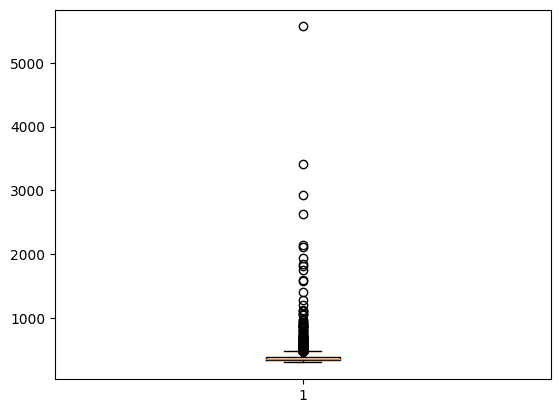

In [38]:
plt.boxplot(df['turnover_A'])
plt.show()

**Significant Right Skew:** The distribution of turnover_A is skewed to the right, indicating that while most data points are concentrated around the median (approximately 1000), a small number of observations have exceptionally high values. This suggests that there are key factors or unique circumstances driving high turnover, which warrants further investigation.

**Presence of High Outliers:** The presence of several outliers on the high end of the distribution indicates that a few clients or transactions generate significantly higher turnover. Understanding the characteristics of these outliers could reveal valuable insights for targeting high-value customers or optimizing strategies for increased turnover.

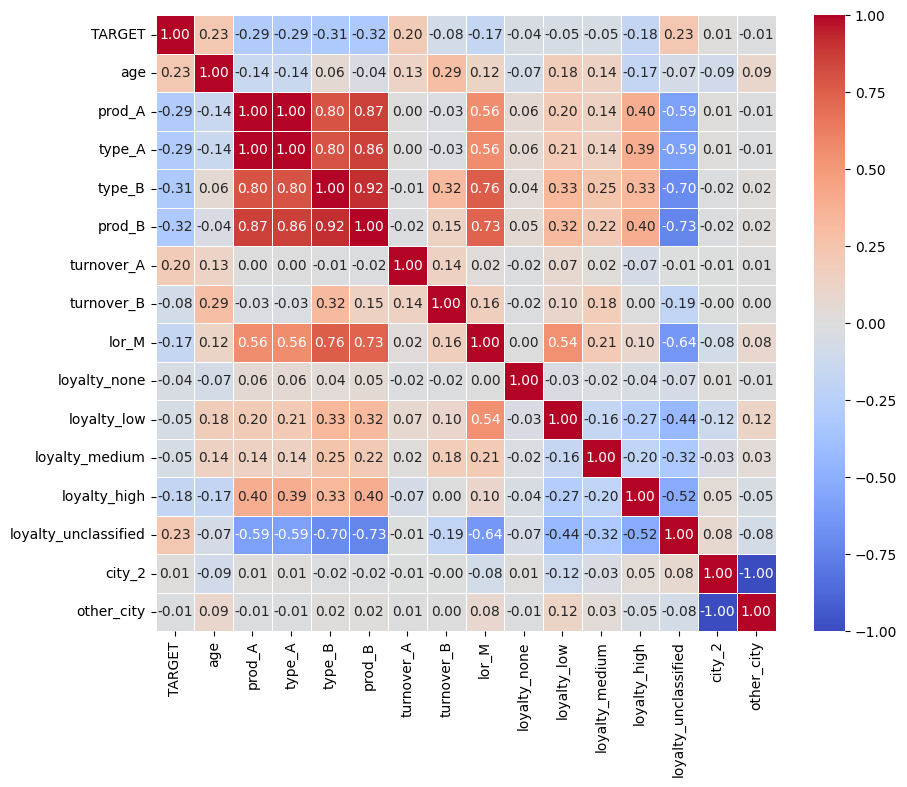

In [39]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10,8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()

### Correlation Heatmap Summary

- **Target Correlations**:
  - `age` has the highest positive correlation with the target (`0.23`).
  - `prod_B` and `type_B` show negative correlations.

- **Feature Correlations**:
  - Strong correlation between `prod_A` and `type_A` (`0.80`), and between `prod_B` and `type_B` (`0.76`).
  - `loyalty_unclassified` negatively correlates with `prod_A` and `type_A` (`-0.59`).

- **Insights**:
  - Features like `prod_A` and `type_A` may indicate multicollinearity.
  - Weak target correlations suggest exploring non-linear models.


Boxplot for age


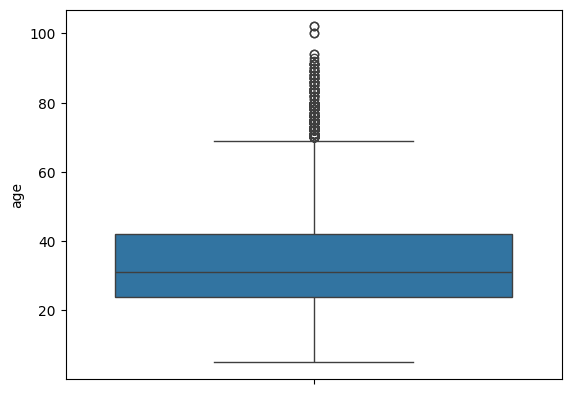



Boxplot for turnover_A


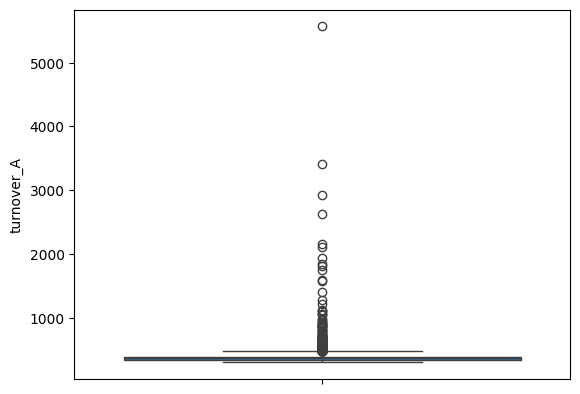



Boxplot for turnover_B


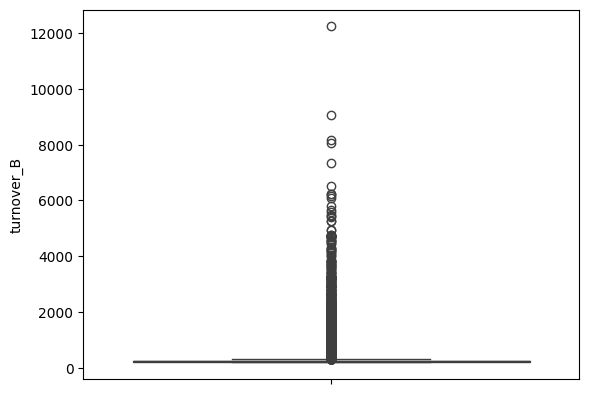



Boxplot for lor_M


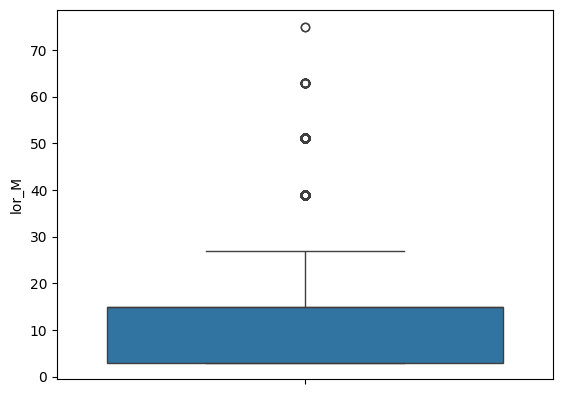

In [40]:
for i in ['age', 'turnover_A', 'turnover_B', 'lor_M']:
  print(f"Boxplot for {i}")
  sns.boxplot(df[i])
  plt.show()
  print("\n")

####Graph 1: Age Distribution
The first boxplot represents the distribution of age, with the median around 40 and an interquartile range (IQR) between 25 and 60. There are significant outliers above 80.

####Graph 2: Turnover_A Distribution
The second boxplot displays a highly skewed distribution of "turnover_A", with most data points concentrated near the lower end, while a considerable number of outliers exceed 1000, stretching up to 5000.

####Graph 3: Turnover_B Distribution
The boxplot shows the distribution of "turnover_B" with a significant concentration of data points near the lower end. There are numerous extreme outliers, with values reaching above 12000, indicating a highly skewed distribution.

####Graph 4: LOR_M Distribution
This boxplot shows a right-skewed distribution of `lor_M` with several outliers above 30.




Histogram for age


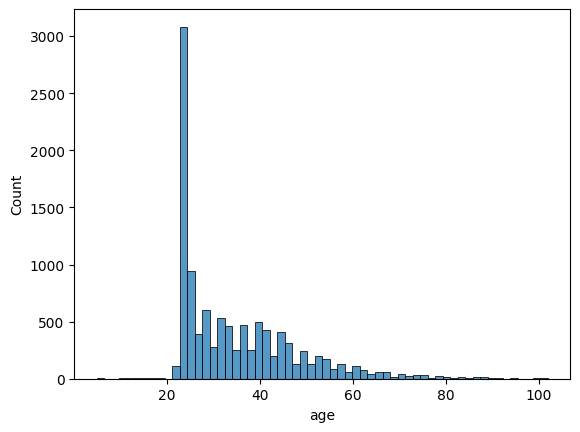



Histogram for turnover_A


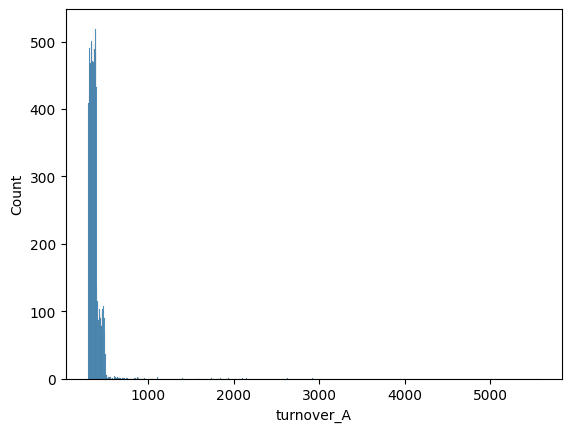



Histogram for turnover_B


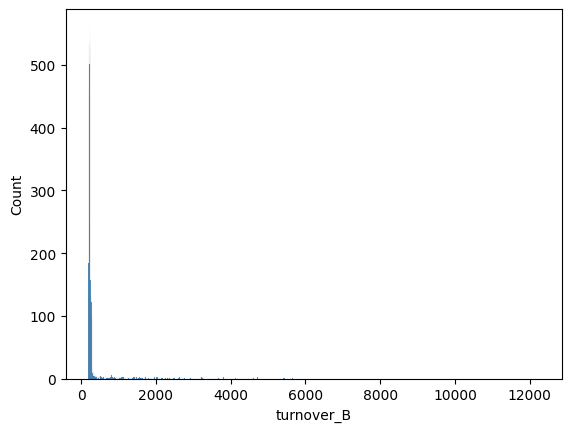



Histogram for lor_M


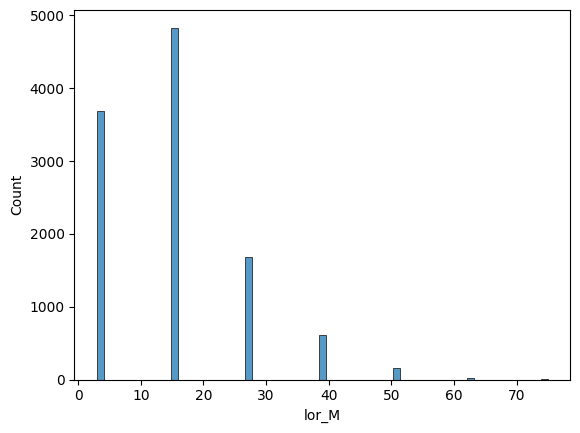

In [41]:
for i in ['age', 'turnover_A', 'turnover_B', 'lor_M']:
  print(f"Histogram for {i}")
  sns.histplot(df[i])
  plt.show()
  print("\n")

####GRAPH1 :
This histogram of `age` shows a right-skewed distribution, with a large concentration of individuals in their early 20s and a gradual decline in frequency as age increases.

####GRAPH2 :
The histogram displays the frequency distribution of the `turnover_A` variable. The data is heavily skewed to the right, with the majority of values concentrated below 1000. A few outliers extend to values greater than 1000, reaching as far as 5000, though their frequency is significantly lower.



####GRAPH3 :
The histogram shows a highly right-skewed distribution for `turnover_B`, with the majority of data points concentrated below 2000, while a few outliers extend up to 12000.


####GRAPH4 :
The graph shows a left-skewed distribution of `lor_M`, with most values concentrated between 0 and 30, peaking around 10 and 20.

In [42]:
# Expect prod_A and prod_B Applying logscaling on every feature
logsc_col = []
for i in ['age', 'turnover_A', 'turnover_B', 'lor_M']:
  df[f"logscale_{i}"] = np.log1p(df[i])
  logsc_col.append(f"logscale_{i}")

Boxplot for logscale_age


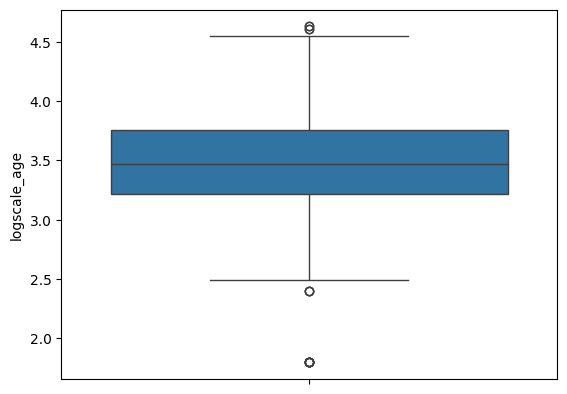



Boxplot for logscale_turnover_A


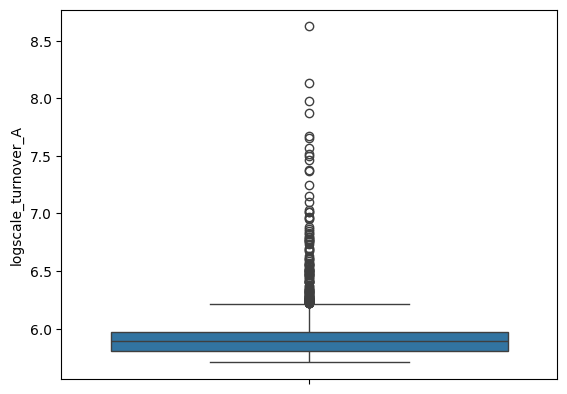



Boxplot for logscale_turnover_B


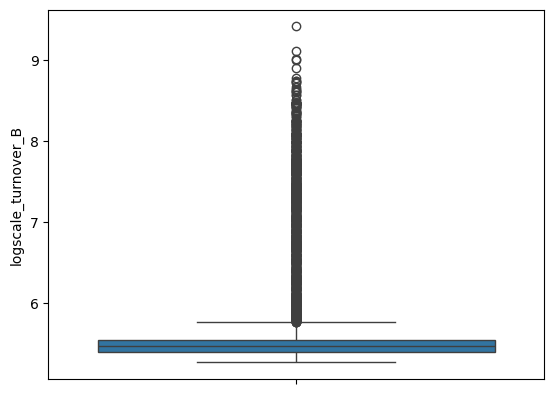



Boxplot for logscale_lor_M


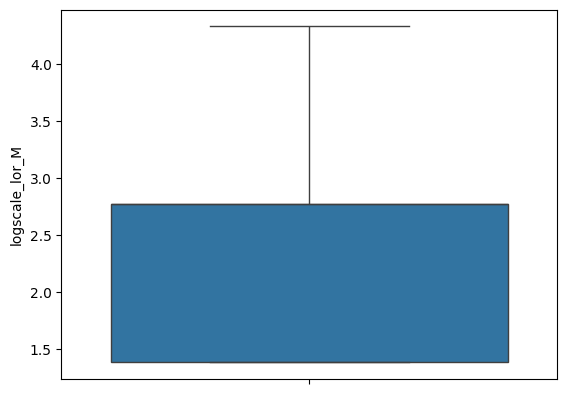

In [43]:
for i in logsc_col:
  print(f"Boxplot for {i}")
  sns.boxplot(df[i])
  plt.show()
  print("\n")

This boxplot after applying a log transformation (`logscale_age`, `logscale_turnover_A`, `logscale_turnover_B`, `logscale_lor_M`) shows a more symmetrical distribution with fewer extreme outliers, improving interpretability and reducing the impact of skewness. Log scaling helps by compressing the range of values, making data more homogenous and highlighting central tendencies without being overly influenced by extreme values.


In [44]:
# drop all the non log transformed columns :
df.drop(['age', 'turnover_A', 'turnover_B', 'lor_M'],axis=1,inplace=True)

In [45]:
df.columns

Index(['TARGET', 'prod_A', 'type_A', 'type_B', 'prod_B', 'loyalty_none',
       'loyalty_low', 'loyalty_medium', 'loyalty_high', 'loyalty_unclassified',
       'city_2', 'other_city', 'logscale_age', 'logscale_turnover_A',
       'logscale_turnover_B', 'logscale_lor_M'],
      dtype='object')

### Principal Component Analysis (PCA)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
def LR_metrics(y_test, y_pred):
  print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
  print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
  print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
  print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plt.plot(fpr, tpr, color='orange', label='ROC')
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

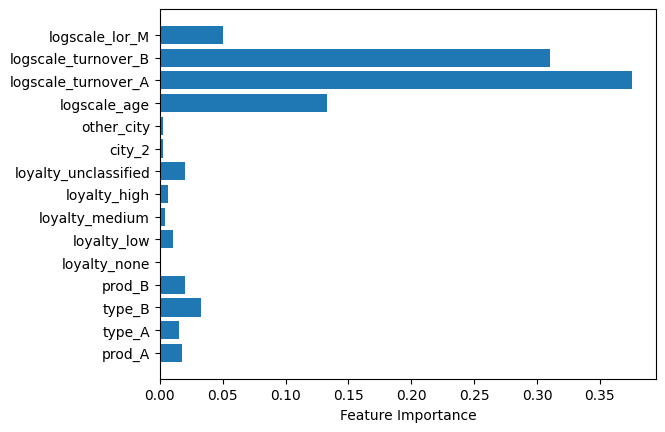

                 Feature  Importance
12   logscale_turnover_A    0.375728
13   logscale_turnover_B    0.310159
11          logscale_age    0.133018
14        logscale_lor_M    0.050187
2                 type_B    0.032357
8   loyalty_unclassified    0.019838
3                 prod_B    0.019713
0                 prod_A    0.017771


In [47]:
from sklearn.ensemble import RandomForestClassifier

# Define X (features) and y (target)
X = df[['prod_A', 'type_A', 'type_B', 'prod_B', 'loyalty_none',
        'loyalty_low', 'loyalty_medium', 'loyalty_high', 'loyalty_unclassified',
        'city_2', 'other_city', 'logscale_age', 'logscale_turnover_A',
        'logscale_turnover_B', 'logscale_lor_M']]
y = df['TARGET']

# Create and train the model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Plotting feature importance
import matplotlib.pyplot as plt
plt.barh(X.columns, importances)
plt.xlabel('Feature Importance')
plt.show()

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 8 most important features
print(feature_importances.head(8))

In [48]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define X (features) and y (target)
X = df[['prod_A', 'type_A', 'type_B', 'prod_B', 'loyalty_none',
        'loyalty_low', 'loyalty_medium', 'loyalty_high', 'loyalty_unclassified',
        'city_2', 'other_city', 'logscale_age', 'logscale_turnover_A',
        'logscale_turnover_B', 'logscale_lor_M']]
y = df['TARGET']

# Initialize the model and RFE
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=8)

# Fit RFE
rfe.fit(X, y)

# Get the mask of selected features (True means selected)
selected_features = rfe.support_

# Create a DataFrame for better visualization
rfe_features = pd.DataFrame({
    'Feature': X.columns,
    'Selected': selected_features
})

# Filter out the selected features
top_features_rfe = rfe_features[rfe_features['Selected']]['Feature'].values
X_top_rfe = X[top_features_rfe]

# Print the selected top 8 features
print(top_features_rfe)


['type_A' 'type_B' 'prod_B' 'loyalty_low' 'logscale_age'
 'logscale_turnover_A' 'logscale_turnover_B' 'logscale_lor_M']


### Model Building

In [50]:
df.shape

(11000, 16)

In [51]:
X= df[top_features_rfe]  # independent variable
y = df.TARGET            # Target varaible

In [52]:
X.head()

,type_A,type_B,prod_B,loyalty_low,logscale_age,logscale_turnover_A,logscale_turnover_B,logscale_lor_M
0,0,0,0,0,4.204693,5.812820,5.582447,1.386294
1,3,3,1,1,3.828641,5.980747,5.655660,3.688879
2,3,6,1,1,3.761200,5.838258,7.070375,3.332205
3,0,0,0,0,3.465736,6.119765,5.494467,1.386294
4,0,0,0,0,4.143135,5.954742,5.662990,1.386294


In [53]:
import statsmodels.api as sm
X = sm.add_constant(X)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
def LR_metrics(y_test, y_pred):
  print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
  print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
  print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

def ROC_AUC_curve(y_test, y_pred):
  print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plt.plot(fpr, tpr, color='orange', label='ROC')
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

In [55]:
# splitting the data into training and testing set into 75: 25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Function for kfold Cross validation, where k = 5


In [56]:
# importing necessary libraries for cross validation for logistic regression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

def kfoldcv(X_train_sm,y_t):
  # Kfolds cv where splits = 5
  kf = KFold(n_splits=5)
  # List to store accuracy scores
  accuracy_lis = []

  # K-Fold Cross Validation
  for train_index, test_index in kf.split(X_train_sm):
      X_train, X_test = X_train_sm.iloc[train_index], X_train_sm.iloc[test_index]
      y_train, y_test = y_t.iloc[train_index], y_t.iloc[test_index]

      # Fit the OLS model
      model = sm.GLM(y_train,X_train, family = sm.families.Binomial()).fit()
      # model = sm.OLS(y_train, X_train).fit()

      # Predict on the test data
      y_pred = model.predict(X_test)
      y_pred = np.where(y_pred>0.5,1,0)


      # Calculate accuracy for the test set
      accuracy = accuracy_score(y_test, y_pred)
      accuracy_lis.append(accuracy)

  # Print the accuracy scores for each fold
  print("Cross-validated Accuracy scores:", accuracy_lis)
  print("Mean Accuracy score:", np.mean(accuracy_lis))

### Logistic Model 1 : res1

In [57]:
# Logistic regression using statsmodel library:
import statsmodels.api as sm
logm1 = sm.GLM(y_train,X_train, family = sm.families.Binomial()) # Binnomial classification
res1 = logm1.fit()
print(res1.summary())
print("Cross validation")
kfoldcv(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 8250
Model:                            GLM   Df Residuals:                     8241
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3669.3
Date:                Sat, 26 Oct 2024   Deviance:                       7338.5
Time:                        03:54:02   Pearson chi2:                 1.71e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2480
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -41.1408    

Accuracy Score: 0.8127272727272727
Confusion Matrix: 
[[1867  138]
 [ 377  368]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2005
           1       0.73      0.49      0.59       745

    accuracy                           0.81      2750
   macro avg       0.78      0.71      0.73      2750
weighted avg       0.80      0.81      0.80      2750

ROC AUC Score: 0.7125659006845304


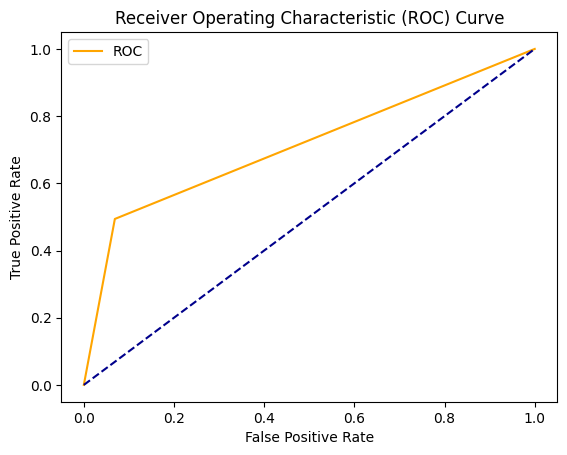

In [58]:
y_pred = res1.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)
LR_metrics(y_test, y_pred)
ROC_AUC_curve(y_test, y_pred)

### Model 1:

- **8** independent variables, selected using RFE (Recursive Feature Elimination), were used to build the model.
- The average cross-validation (CV) accuracy score is approximately 0.8035.
- The accuracy score on the test data is approximately 0.8127.
- Model `res1` can be considered a good model, based on the mean CV accuracy score and the accuracy score on the test data.
- There are certain variables whose p-values are greater than 0.05, and their coefficient values are close to zero.
- The ROC-AUC score is 0.7125. Based on the curve, we can say the model is decent, but other machine learning models could be explored to improve the ROC-AUC score.


In [59]:
# null error rate
y_test.value_counts()[0]/y_test.shape[0]

0.7290909090909091

### Logistic Model 2 : res2

In [60]:
# Drop prod_B since it has p > 0.05
X2=X.drop(['logscale_lor_M'],axis=1)

In [61]:
# splitting the data into training and testing set into 75: 25
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, random_state=42)

In [62]:
logm2 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res2 = logm2.fit()
print(res2.summary())
print("Cross validation")
kfoldcv(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 8250
Model:                            GLM   Df Residuals:                     8242
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3670.7
Date:                Sat, 26 Oct 2024   Deviance:                       7341.4
Time:                        03:54:10   Pearson chi2:                 1.60e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2477
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -40.8593    

In [63]:
y_pred = res2.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)
LR_metrics(y_test, y_pred)

Accuracy Score: 0.8116363636363636
Confusion Matrix: 
[[1865  140]
 [ 378  367]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2005
           1       0.72      0.49      0.59       745

    accuracy                           0.81      2750
   macro avg       0.78      0.71      0.73      2750
weighted avg       0.80      0.81      0.80      2750



### Model 2:

- Seven independent variables were used to build the model after dropping `logscale_lor_M`, which had a p-value of 0.093 (greater than 0.05).
- The average cross-validation (CV) accuracy score is approximately 0.8035.
- The accuracy score on the test data is approximately 0.8116.
- Model `res2` can be considered a good model, based on the mean CV accuracy score and the accuracy score on the test data.
- There are certain variables whose p-values are greater than 0.05, and their coefficient values are close to zero.
- Metrics like precision and recall also look good for the model.


In [64]:
# drop prod_b
X3=X2.drop(['prod_B'],axis=1)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.25, random_state=42)

### Logistic Model 3 : res3

In [66]:
logm3 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res3 = logm3.fit()
print(res3.summary())
print("Cross validation")
kfoldcv(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 8250
Model:                            GLM   Df Residuals:                     8243
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3671.6
Date:                Sat, 26 Oct 2024   Deviance:                       7343.1
Time:                        03:54:15   Pearson chi2:                 1.76e+06
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2476
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -41.0378    

In [67]:
y_pred = res3.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)
LR_metrics(y_test, y_pred)

Accuracy Score: 0.812
Confusion Matrix: 
[[1865  140]
 [ 377  368]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      2005
           1       0.72      0.49      0.59       745

    accuracy                           0.81      2750
   macro avg       0.78      0.71      0.73      2750
weighted avg       0.80      0.81      0.80      2750



### Model 3:

- 6 independent variables were used to build the model after dropping `prod_B`, which had a p-value of 0.179 (greater than 0.05).
- The average cross-validation (CV) accuracy score is approximately 0.8038.
- The accuracy score on the test data is approximately 0.812.
- Model `res3` can be considered a good model, based on the mean CV accuracy score and the accuracy score on the test data.
- There are certain variables whose p-values are greater than 0.05, and their coefficient values are close to zero.
- Metrics like precision and recall also look good for the model.


### PCA

In [68]:
X = df.drop('TARGET',axis=1)
y = df.TARGET.reset_index(drop=True)

In [69]:
PCA_group=['logscale_age', 'logscale_turnover_A',
       'logscale_turnover_B', 'logscale_lor_M']

In [70]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X[PCA_group])

# Output the number of components retained
print(f'Original number of features: {X[PCA_group].shape[1]}')
print(f'Number of PCA components: {X_pca.shape[1]}')

print(pca.explained_variance_ratio_)  # Variance explained by each component
print(f'Total variance explained by selected components: {sum(pca.explained_variance_ratio_)}')

Original number of features: 4
Number of PCA components: 3
[0.6571561  0.23984587 0.08314761]
Total variance explained by selected components: 0.9801495880132031


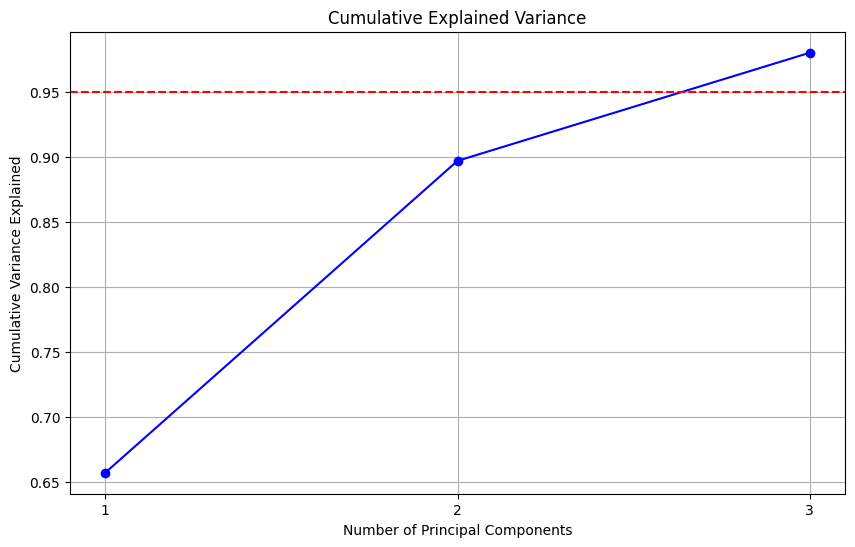

In [71]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='blue')
plt.axhline(y=0.95, color='r', linestyle='--')  # Horizontal line for 95%
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.show()

In [72]:
pca = PCA(n_components=3)  # Specify the number of components again if you want
X_pca = pca.fit_transform(X[PCA_group])

pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

In [73]:
df_gp2 = X.reset_index().drop('index', axis = 1)
new_df = pd.concat([df_gp2, df_pca], axis = 1)
X = new_df.drop(PCA_group, axis = 1)
import statsmodels.api as sm
X = sm.add_constant(X)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Logistic Model 4 : res4

In [75]:
  # Logistic regression using statsmodel library:
import statsmodels.api as sm
logm4 = sm.GLM(y_train,X_train, family = sm.families.Binomial())
res4 = logm4.fit()
print(res4.summary())
print("Cross validation")
kfoldcv(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 TARGET   No. Observations:                 8250
Model:                            GLM   Df Residuals:                     8237
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4045.0
Date:                Sat, 26 Oct 2024   Deviance:                       8090.0
Time:                        03:54:27   Pearson chi2:                 8.15e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.1763
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.7257 

In [76]:
y_pred = res4.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)
LR_metrics(y_test, y_pred)

Accuracy Score: 0.7734545454545455
Confusion Matrix: 
[[1849  156]
 [ 467  278]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2005
           1       0.64      0.37      0.47       745

    accuracy                           0.77      2750
   macro avg       0.72      0.65      0.66      2750
weighted avg       0.76      0.77      0.75      2750



### Model 4:

- Fourteen independent variables were used to build the model after performing PCA.
- The average cross-validation (CV) accuracy score is approximately 0.76.
- The accuracy score on the test data is approximately 0.77.
- Model `res4` can be considered a decent model based on the mean CV accuracy score and the accuracy score on the test data. However, it is not as good compared to the other three models, so we can disregard this model.
- There are many variables whose p-values are greater than 0.05.
- Further dropping variables only decreases accuracy and does not improve the model compared to the initial models built without PCA. Therefore, we are going to reject this model.


### Model Comparison

| Model         | mean CV Score | Precision (Class 1) | Recall (Class 1) |Accuracy(test)|
|---------------|---------------|---------------------|------------------|--------------|
| First Model   | 0.8035        | 0.73                | 0.49             | 0.8127       |
| Second Model  | 0.8035        | 0.72                | 0.49             | 0.8116       |
| Third Model   | 0.8038        | 0.72                | 0.49             | 0.812        |
| Fourth Model  | 0.7649        | 0.64                | 0.37             | 0.7734       |

All four models demonstrate good accuracy, precision, and recall, with consistent performance across the metrics. However, the third model stands out due to its slightly higher mean CV score with fewer independent variables compared to the other models. On the other hand, the fourth model, built using PCA, can be considered the weakest among the four models and therefore is not suitable for prediction.


### Best fit model Comparison with Null Error Rate

| Metric                 | Third Model  |
|------------------------|--------------|
| Accuracy(CV)           | 0.8038       |
| Precision (Class 1)    | 0.72         |
| Recall (Class 1)       | 0.49         |
| Accuracy(Test)         | 0.812        |

- **Null Error Rate:** 0.7290

The null error rate represents the accuracy achieved by a model that always predicts the majority class. Comparing the 3rd model's accuracy of 81.2% with the null error rate of 72.9%, we can see that the model significantly outperforms the null model. Additionally, the precision, recall, and F1-score metrics for class 1 indicate that the model effectively identifies positive instances despite the class imbalance.



### Conclusion

The project aimed to develop logistic regression models to predict customer purchases of an additional insurance product based on various customer attributes and buying behavior.

**Key Findings:**

1. **Data Exploration:**
   - The dataset comprised customer information such as age, loyalty level, buying behavior of other products, and contract type.
   - Exploratory Data Analysis (EDA) provided insights into the distribution of features, including age, loyalty, and turnover of products.

2. **Data Preparation:**
   - Data preprocessing steps included One Hot Encoding, handling duplicate values  and meaningless data.
   - Scaling of the data.

3. **Model Building:**
   - Four logistic regression models were constructed:
   - Three of them were built using different sets of features selected based on RFE and p-values.
   - The fourth model was built using a set of features that includes principal components from PCA.
   - Evaluation metrics such as accuracy, precision, recall, and F1-score were utilized to assess model performance.

4. **Model Evaluation:**
   - The models demonstrated good accuracy, precision, and recall, indicating their effectiveness in predicting customer purchases of the additional insurance product.
   - Comparison with the null error rate showed that the models significantly outperformed a baseline model.



the logistic regression models developed in this project offer valuable insights into customer behavior and purchasing patterns. By leveraging customer attributes and buying behavior data, insurance companies can better understand customer preferences and tailor marketing strategies to target potential buyers effectively. Further research could explore additional features or employ more advanced machine learning techniques to enhance predictive performance. Overall, this project lays the foundation for leveraging data-driven approaches to improve business outcomes in the insurance industry.


## K-Nearest Neighbors (KNN) Model

The below code demonstrates a simple K-Nearest Neighbors (KNN) classifier with `n_neighbors=3`. The model was trained and tested on a dataset split into `X_train`, `X_test`, `y_train`, and `y_test`. The model achieved an accuracy score of **0.81** on the test data.


In [78]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.81


The optimal number of neighbors is 6


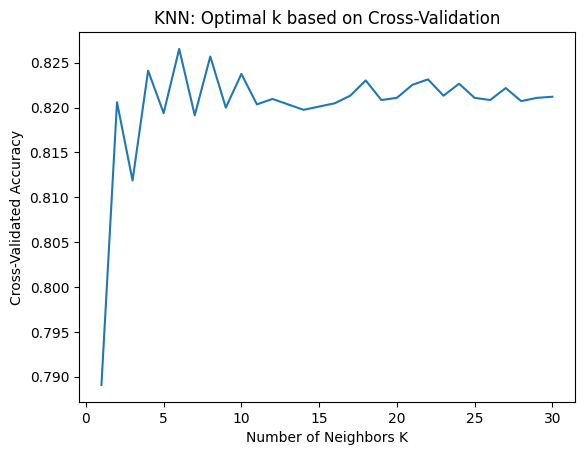

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define a range of k values to test
k_range = range(1, 31)

# Create a list to store cross-validation scores for each k
cv_scores = []

# Perform cross-validation to find the best k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Use 10-fold cross-validation and take the mean of the accuracy scores
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k (the one with the highest cross-validation score)
optimal_k = k_range[np.argmax(cv_scores)]
print(f"The optimal number of neighbors is {optimal_k}")

# Plotting the results
plt.plot(k_range, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN: Optimal k based on Cross-Validation')
plt.show()


## Optimizing K-Nearest Neighbors (KNN) with Cross-Validation

The plot above illustrates the accuracy of a K-Nearest Neighbors (KNN) classifier with varying values of `k` (number of neighbors), using cross-validation to evaluate model performance. The goal is to identify the optimal `k` that maximizes accuracy.

### Observations:
- The cross-validated accuracy generally improves as `k` increases initially.
- The highest accuracy is observed at **k=6**, indicating it as the optimal choice for this dataset.
- Beyond `k=6`, the accuracy fluctuates slightly, showing no substantial improvement with larger `k` values.

### Conclusion:
Setting `k=6` achieves the best cross-validated accuracy of approximately **82.5%**.


In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}

# Initialize GridSearchCV with SVM
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)

# Fit on the training data
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   5.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   4.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   2.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   1.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   2.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.3s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.4s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   1.8s
[CV] END ......................C=0.1, gamma=auto

Using `GridSearchCV` for hyperparameter tuning on an SVM model, the optimal parameters were found to be `C=10`, `gamma='scale'`, and `kernel='rbf'`, achieving the best cross-validated performance.


In [83]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize the SVM model with RBF kernel
svm_rbf_model = SVC(kernel='rbf', C=10, gamma='auto')

# Fit the model on the training data
svm_rbf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rbf = svm_rbf_model.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred_rbf)
precision = precision_score(y_test, y_pred_rbf, average='weighted')  # Adjust average as needed
recall = recall_score(y_test, y_pred_rbf, average='weighted')  # Adjust average as needed

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')


Accuracy: 0.81
Precision: 0.81
Recall: 0.81


The SVM model with an RBF kernel (`C=10`, `gamma='auto'`) achieved an accuracy of 0.81 on the test data, with a weighted precision and recall of 0.81, indicating balanced performance across classes.
